In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import lasio
import numpy as np

In [2]:

las = lasio.read('well3.LAS')

In [4]:
data = las.df()
data["DEPTH"]=data.index

In [5]:
data

,AC,CALI,DEN,GR,NEU,RDEP,RMED,DEPTH
DEPT,,,,,,,,
102.1568,NaN,NaN,NaN,5.3274,NaN,NaN,NaN,102.1568
102.3092,NaN,NaN,NaN,5.8235,NaN,NaN,NaN,102.3092
102.4616,NaN,NaN,NaN,6.5228,NaN,NaN,NaN,102.4616
102.6140,NaN,NaN,NaN,7.2285,NaN,NaN,NaN,102.6140
102.7664,NaN,NaN,NaN,9.5020,NaN,NaN,NaN,102.7664
...,...,...,...,...,...,...,...,...
4635.9044,NaN,NaN,NaN,NaN,NaN,0.7729,0.5978,4635.9044
4636.0568,NaN,NaN,NaN,NaN,NaN,0.8369,0.6257,4636.0568
4636.2092,NaN,NaN,NaN,NaN,NaN,0.8741,0.6888,4636.2092


In [6]:
data.describe()

,AC,CALI,DEN,GR,NEU,RDEP,RMED,DEPTH
count,7007.000000,7007.000000,7084.000000,28117.000000,7096.000000,12223.000000,12223.000000,29754.000000
mean,79.498714,9.611068,2.449055,71.986798,20.117166,2.438382,2.386781,2369.335400
std,18.390705,1.019751,0.165122,32.922780,14.729530,6.631202,5.735731,1309.022166
min,1.025100,6.000000,1.943000,2.766100,2.178300,0.250300,0.179000,102.156800
25%,66.154350,9.142900,2.319975,50.255200,10.631350,0.988000,0.847850,1235.746100
50%,74.661900,9.589400,2.505600,74.998500,15.718550,1.536100,1.490800,2369.335400
75%,93.304550,9.904800,2.585125,92.343800,25.067375,2.434050,2.415400,3502.924700
max,181.813900,20.330400,3.001300,304.333700,146.347400,198.537100,168.604400,4636.514000


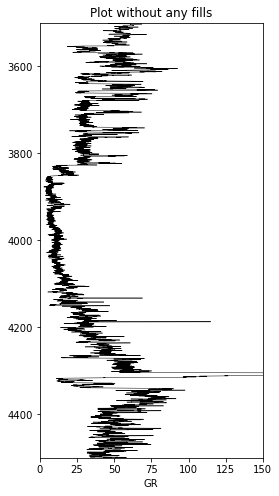

In [8]:
data.plot(x="GR",y="DEPTH",c="black",lw=0.5,legend=False, figsize=(4,8))
plt.ylim(4500, 3500)
plt.xlim(0,150)
plt.title("Plot without any fills")
plt.show()

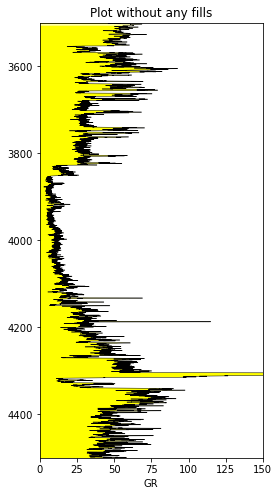

In [11]:
data.plot(x="GR",y="DEPTH",c="black",lw=0.5,legend=False, figsize=(4,8))
plt.fill_betweenx(data["DEPTH"], data["GR"],facecolor='yellow')
plt.ylim(4500, 3500)
plt.xlim(0,150)
plt.title("Plot without any fills")
plt.show()

In [ ]:

df.plot(x='GR', y='DEPTH', c='black', 
        lw=0.5, legend=False, figsize=(7,10))

plt.fill_betweenx(df['DEPTH'], df['GR'], 0, facecolor='green')
plt.fill_betweenx(df['DEPTH'], df['GR'], 150, facecolor='yellow')
plt.ylim(4500, 3500)
plt.xlim(0,150)
plt.title('Plot With a Double Colour Fill')
plt.show(

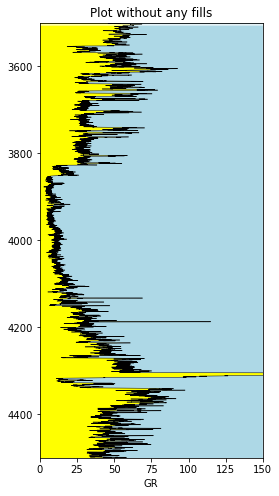

In [14]:
data.plot(x="GR",y="DEPTH",c="black",lw=0.5,legend=False, figsize=(4,8))
plt.fill_betweenx(data["DEPTH"], data["GR"],facecolor='yellow')
plt.fill_betweenx(data["DEPTH"], data["GR"],150,facecolor='lightblue')
plt.ylim(4500, 3500)
plt.xlim(0,150)
plt.title("Plot without any fills")
plt.show()

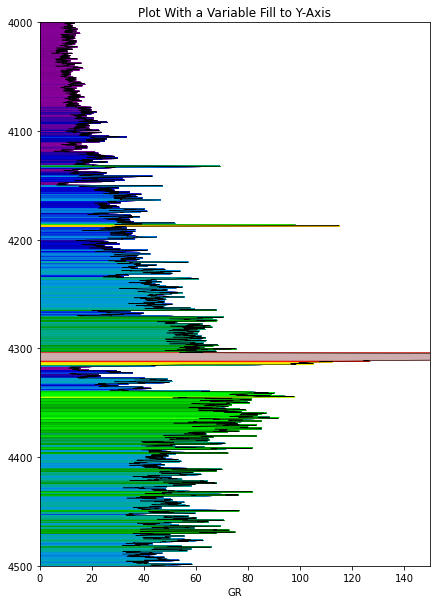

In [22]:
left_col_value = 0
right_col_value = 150

#assign the column to a variable for easier reading
curve = data['GR']

#calculate the span of values
span = abs(left_col_value - right_col_value)

#assign a color map
cmap = plt.get_cmap('nipy_spectral')

#create array of values to divide up the area under curve
color_index = np.arange(left_col_value, right_col_value, span / 100)

#setup the plot
data.plot(x='GR', y='DEPTH', c='black', lw=0.5, legend=False, figsize=(7,10))
plt.ylim(4500, 4000)
plt.xlim(left_col_value, right_col_value)
plt.title('Plot With a Variable Fill to Y-Axis')

#loop through each value in the color_index
for index in sorted(color_index):
    index_value = (index - left_col_value)/span
    color = cmap(index_value) #obtain colour for color index value
    plt.fill_betweenx(data['DEPTH'], 0 , curve, where = curve >= index,  color = color)
plt.savefig('12_3.png', dpi=100)
plt.show()

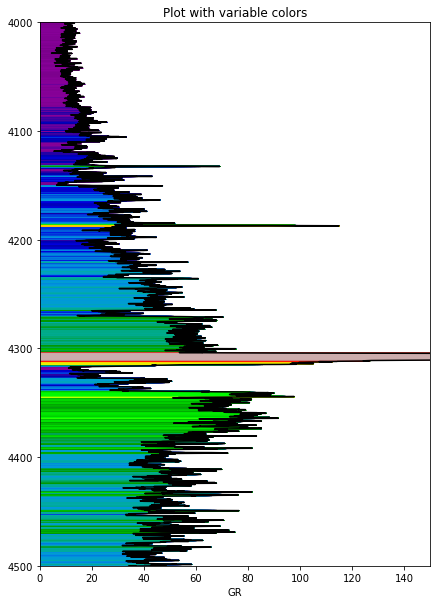

In [27]:
left_value = 0
right_value = 150

curve = data["GR"]

span = abs(left_value-right_value)

cmap = plt.get_cmap('nipy_spectral')

color_index = np.arange(left_value,right_value, span/100)

data.plot(x="GR", y ="DEPTH", c="black",legend=False, figsize=(7,10))
plt.ylim(4500,4000)
plt.xlim(left_value, right_value)
plt.title("Plot with variable colors")

for index in sorted(color_index):
    index_value = (index - left_value)/span
    color = cmap(index_value) #obtain colour for color index value
    plt.fill_betweenx(data['DEPTH'], 0 , curve, where = curve >= index,  color = color)
plt.savefig('12_3.png', dpi=100)
plt.show()






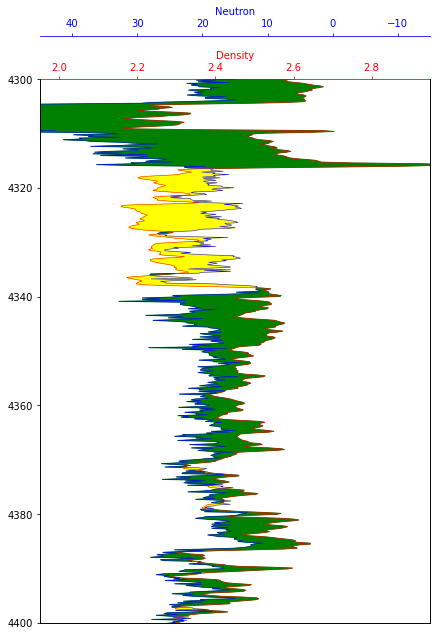

In [40]:
fig = plt.subplots(figsize=(7,10))

ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)
ax2 = ax1.twiny()

ax1.plot('DEN', 'DEPTH', data=data, color='red', lw=0.5)
ax1.set_xlim(1.95, 2.95)
ax1.set_xlabel('Density')
ax1.xaxis.label.set_color("red")
ax1.tick_params(axis='x', colors="red")
ax1.spines["top"].set_edgecolor("red")

ax2.plot('NEU', 'DEPTH', data=data, color='blue', lw=0.5)
ax2.set_xlim(45, -15)
ax2.set_xlabel('Neutron')
ax2.xaxis.label.set_color("blue")
ax2.spines["top"].set_position(("axes", 1.08))
ax2.tick_params(axis='x', colors="blue")
ax2.spines["top"].set_edgecolor("blue")

x1=data['DEN']
x2=data['NEU']

x = np.array(ax1.get_xlim())
z = np.array(ax2.get_xlim())

nz=((x2-np.max(z))/(np.min(z)-np.max(z)))*(np.max(x)-np.min(x))+np.min(x)

ax1.fill_betweenx(data['DEPTH'], x1, nz, where=x1>=nz, interpolate=True, color='green')
ax1.fill_betweenx(data['DEPTH'], x1, nz, where=x1<=nz, interpolate=True, color='yellow')

for ax in [ax1, ax2]:
    ax.set_ylim(4400, 4300)
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

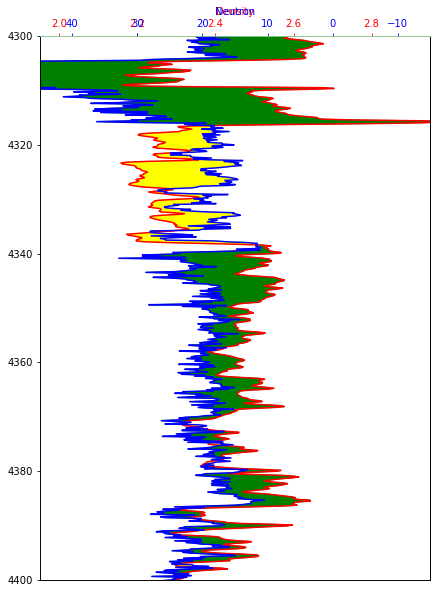

In [37]:
fig = plt.subplots(figsize=(7,10))

ax1 = plt.subplot2grid((1,1),(0,0),rowspan=1, colspan=1)
ax2 = ax1.twiny()

ax1.plot("DEN", "DEPTH", data=data, color="red")
ax1.set_xlim(1.95, 2.95)
ax1.set_xlabel("Density")
ax1.xaxis.label.set_color("red")
ax1.tick_params(axis="x",colors="red")
ax1.spines["top"].set_edgecolor("purple")

ax2.plot("NEU","DEPTH",data=data, color="blue")
ax2.set_xlim(45, -15)
ax2.set_xlabel("Neutron")
ax2.xaxis.label.set_color("blue")
ax2.tick_params(axis="x",colors="blue")
ax2.spines["top"].set_edgecolor("lightgreen")


x1 = data["DEN"]
x2 = data["NEU"]

x = np.array(ax1.get_xlim())
z = np.array(ax2.get_xlim())

nz= ((x2-np.max(z))/(np.min(z)-(np.max(z))))*(np.max(x)-np.min(x))+np.min(x)

ax1.fill_betweenx(data["DEPTH"], x1, nz, where=x1>=nz, interpolate=True, color="green")
ax1.fill_betweenx(data["DEPTH"], x1, nz, where=x1<=nz, interpolate=True, color="yellow")

for ax in [ax1, ax2]:
    ax.set_ylim(4400,4300)
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")